In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/Users/kimdongkyu/Desktop/python/santander-customer-satisfaction/train.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:

# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0, stratify=y_labels)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960438
1    0.039562
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.806131	validation_1-auc:0.778639
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.811867	validation_1-auc:0.784901
[2]	validation_0-auc:0.81454	validation_1-auc:0.788032
[3]	validation_0-auc:0.816373	validation_1-auc:0.790142
[4]	validation_0-auc:0.817591	validation_1-auc:0.791164
[5]	validation_0-auc:0.821018	validation_1-auc:0.794698
[6]	validation_0-auc:0.822843	validation_1-auc:0.796272
[7]	validation_0-auc:0.824045	validation_1-auc:0.796976
[8]	validation_0-auc:0.823207	validation_1-auc:0.796625
[9]	validation_0-auc:0.822984	validation_1-auc:0.796541
[10]	validation_0-auc:0.821323	validation_1-auc:0.795906
[11]	validation_0-auc:0.823286	validation_1-auc:0.796844
[12]	validation_0-auc:0.824967	validation_1-auc:0.79843
[13]	validation_0-auc:0.823987	validation_1-auc:0.797144
[14]	validation_0-auc:0.825334	validation_1-auc:0.798617

[141]	validation_0-auc:0.865204	validation_1-auc:0.824012
[142]	validation_0-auc:0.865296	validation_1-auc:0.824098
[143]	validation_0-auc:0.865413	validation_1-auc:0.824031
[144]	validation_0-auc:0.865482	validation_1-auc:0.824067
[145]	validation_0-auc:0.865664	validation_1-auc:0.823951
[146]	validation_0-auc:0.865727	validation_1-auc:0.823939
[147]	validation_0-auc:0.865977	validation_1-auc:0.823965
[148]	validation_0-auc:0.86606	validation_1-auc:0.823847
[149]	validation_0-auc:0.866117	validation_1-auc:0.823899
[150]	validation_0-auc:0.866148	validation_1-auc:0.823896
[151]	validation_0-auc:0.866232	validation_1-auc:0.823841
[152]	validation_0-auc:0.866293	validation_1-auc:0.823723
[153]	validation_0-auc:0.866364	validation_1-auc:0.823744
[154]	validation_0-auc:0.866578	validation_1-auc:0.823682
[155]	validation_0-auc:0.8667	validation_1-auc:0.823632
[156]	validation_0-auc:0.866765	validation_1-auc:0.823568
[157]	validation_0-auc:0.866973	validation_1-auc:0.823512
[158]	validation_

In [15]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 하지만 나는 정한다.  
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/kimdongkyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.706543	validation_1-auc:0.678165
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.731161	validation_1-auc:0.705734
[2]	validation_0-auc:0.808454	validation_1-auc:0.780893
[3]	validation_0-auc:0.818999	validation_1-auc:0.791912
[4]	validation_0-auc:0.825899	validation_1-auc:0.798525
[5]	validation_0-auc:0.831752	validation_1-auc:0.805165
[6]	validation_0-auc:0.826871	validation_1-auc:0.800101
[7]	validation_0-auc:0.834917	validation_1-auc:0.80738
[8]	validation_0-auc:0.830585	validation_1-auc:0.801333
[9]	validation_0-auc:0.826945	validation_1-auc:0.797335
[10]	validation_0-auc:0.836968	validation_1-auc:0.806556
[11]	validation_0-auc:0.840154	validation_1-auc:0.809159
[12]	validation_0-auc:0.843528	validation_1-auc:0.811457
[13]	validation_0-auc:0.843042	validation_1-auc:0.80653
[14]	validation_0-auc:0.839907	validation_1-auc:0.802175

[40]	validation_0-auc:0.860576	validation_1-auc:0.818372
[41]	validation_0-auc:0.861285	validation_1-auc:0.819331
[42]	validation_0-auc:0.862178	validation_1-auc:0.819861
[43]	validation_0-auc:0.862442	validation_1-auc:0.819899
[44]	validation_0-auc:0.862882	validation_1-auc:0.819637
[45]	validation_0-auc:0.863725	validation_1-auc:0.820175
[46]	validation_0-auc:0.864336	validation_1-auc:0.820367
[47]	validation_0-auc:0.86501	validation_1-auc:0.820838
[48]	validation_0-auc:0.865145	validation_1-auc:0.820087
[49]	validation_0-auc:0.865638	validation_1-auc:0.820538
[50]	validation_0-auc:0.866186	validation_1-auc:0.820844
[51]	validation_0-auc:0.866736	validation_1-auc:0.8209
[52]	validation_0-auc:0.867498	validation_1-auc:0.821197
[53]	validation_0-auc:0.867955	validation_1-auc:0.821622
[54]	validation_0-auc:0.868397	validation_1-auc:0.821823
[55]	validation_0-auc:0.868632	validation_1-auc:0.821962
[56]	validation_0-auc:0.868988	validation_1-auc:0.822105
[57]	validation_0-auc:0.869357	val

KeyboardInterrupt: 

XGBoostError: need to call fit or load_model beforehand

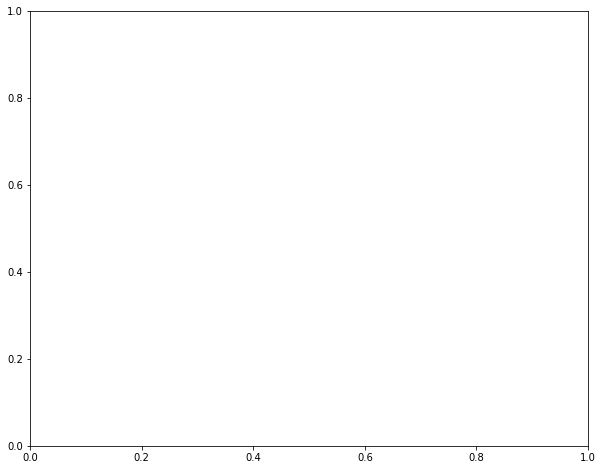

In [16]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

# lightGBM 실시

In [17]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/kimdongkyu/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


[1]	valid_0's auc: 0.795963	valid_0's binary_logloss: 0.159288
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.801791	valid_0's binary_logloss: 0.155033
[3]	valid_0's auc: 0.803347	valid_0's binary_logloss: 0.151848
[4]	valid_0's auc: 0.804643	valid_0's binary_logloss: 0.14969
[5]	valid_0's auc: 0.808337	valid_0's binary_logloss: 0.14774
[6]	valid_0's auc: 0.810543	valid_0's binary_logloss: 0.146248
[7]	valid_0's auc: 0.815338	valid_0's binary_logloss: 0.144947
[8]	valid_0's auc: 0.816354	valid_0's binary_logloss: 0.143927
[9]	valid_0's auc: 0.817909	valid_0's binary_logloss: 0.143015
[10]	valid_0's auc: 0.818505	valid_0's binary_logloss: 0.142346
[11]	valid_0's auc: 0.818062	valid_0's binary_logloss: 0.14179
[12]	valid_0's auc: 0.819618	valid_0's binary_logloss: 0.141273
[13]	valid_0's auc: 0.820168	valid_0's binary_logloss: 0.140783
[14]	valid_0's auc: 0.821643	valid_0's binary_logloss: 0.140372
[15]	valid_0's auc: 0.821538	valid_0's binary_logloss:

[129]	valid_0's auc: 0.812935	valid_0's binary_logloss: 0.141724
[130]	valid_0's auc: 0.812864	valid_0's binary_logloss: 0.141747
Early stopping, best iteration is:
[30]	valid_0's auc: 0.823853	valid_0's binary_logloss: 0.138211
ROC AUC: 0.8239


In [18]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/Users/kimdongkyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.823013	valid_0's binary_logloss: 0.157599	valid_1's auc: 0.790743	valid_1's binary_logloss: 0.15957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829507	valid_0's binary_logloss: 0.15203	valid_1's auc: 0.79822	valid_1's binary_logloss: 0.154927
[3]	valid_0's auc: 0.834674	valid_0's binary_logloss: 0.147974	valid_1's auc: 0.800682	valid_1's binary_logloss: 0.1519
[4]	valid_0's auc: 0.841586	valid_0's binary_logloss: 0.144944	valid_1's auc: 0.806748	valid_1's binary_logloss: 0.149617
[5]	valid_0's auc: 0.845466	valid_0's binary_logloss: 0.142464	valid_1's auc: 0.812166	valid_1's binary_logloss: 0.147629
[6]	valid_0's auc: 0.846831	valid_0's binary_logloss: 0.140356	valid_1's auc: 0.812302	valid_1's binary_logloss: 0.146166
[7]	valid_0's auc: 0.848919	valid_0's binary_logloss: 0.138617	valid_1's auc: 0.813475	valid_1's binary_logloss: 0.144915
[8]	valid_0's auc: 0.850955	valid_0's binary_logloss: 0.137114	valid_1's auc: 0.814566	val

[17]	valid_0's auc: 0.86585	valid_0's binary_logloss: 0.12916	valid_1's auc: 0.819443	valid_1's binary_logloss: 0.139473
[18]	valid_0's auc: 0.867129	valid_0's binary_logloss: 0.128596	valid_1's auc: 0.819342	valid_1's binary_logloss: 0.139283
[19]	valid_0's auc: 0.867988	valid_0's binary_logloss: 0.128093	valid_1's auc: 0.818945	valid_1's binary_logloss: 0.139217
[20]	valid_0's auc: 0.869463	valid_0's binary_logloss: 0.127658	valid_1's auc: 0.820062	valid_1's binary_logloss: 0.139041
[21]	valid_0's auc: 0.870407	valid_0's binary_logloss: 0.127196	valid_1's auc: 0.820255	valid_1's binary_logloss: 0.138914
[22]	valid_0's auc: 0.871522	valid_0's binary_logloss: 0.126731	valid_1's auc: 0.819604	valid_1's binary_logloss: 0.138934
[23]	valid_0's auc: 0.872375	valid_0's binary_logloss: 0.126352	valid_1's auc: 0.820358	valid_1's binary_logloss: 0.1388
[24]	valid_0's auc: 0.873258	valid_0's binary_logloss: 0.125964	valid_1's auc: 0.820444	valid_1's binary_logloss: 0.138744
[25]	valid_0's auc: 

[15]	valid_0's auc: 0.86202	valid_0's binary_logloss: 0.130631	valid_1's auc: 0.816526	valid_1's binary_logloss: 0.140356
[16]	valid_0's auc: 0.863722	valid_0's binary_logloss: 0.129988	valid_1's auc: 0.817082	valid_1's binary_logloss: 0.140143
[17]	valid_0's auc: 0.864712	valid_0's binary_logloss: 0.129452	valid_1's auc: 0.818201	valid_1's binary_logloss: 0.139919
[18]	valid_0's auc: 0.865267	valid_0's binary_logloss: 0.128956	valid_1's auc: 0.817738	valid_1's binary_logloss: 0.139761
[19]	valid_0's auc: 0.866858	valid_0's binary_logloss: 0.12844	valid_1's auc: 0.818158	valid_1's binary_logloss: 0.139633
[20]	valid_0's auc: 0.868196	valid_0's binary_logloss: 0.127954	valid_1's auc: 0.818025	valid_1's binary_logloss: 0.139504
[21]	valid_0's auc: 0.868978	valid_0's binary_logloss: 0.127545	valid_1's auc: 0.817732	valid_1's binary_logloss: 0.139462
[22]	valid_0's auc: 0.869659	valid_0's binary_logloss: 0.127168	valid_1's auc: 0.818141	valid_1's binary_logloss: 0.139343
[23]	valid_0's auc

[28]	valid_0's auc: 0.874829	valid_0's binary_logloss: 0.125146	valid_1's auc: 0.819102	valid_1's binary_logloss: 0.139166
[29]	valid_0's auc: 0.875527	valid_0's binary_logloss: 0.124824	valid_1's auc: 0.819368	valid_1's binary_logloss: 0.139057
[30]	valid_0's auc: 0.876278	valid_0's binary_logloss: 0.124544	valid_1's auc: 0.819114	valid_1's binary_logloss: 0.139122
[31]	valid_0's auc: 0.877272	valid_0's binary_logloss: 0.124253	valid_1's auc: 0.819654	valid_1's binary_logloss: 0.139087
[32]	valid_0's auc: 0.87789	valid_0's binary_logloss: 0.123981	valid_1's auc: 0.819715	valid_1's binary_logloss: 0.13906
[33]	valid_0's auc: 0.878638	valid_0's binary_logloss: 0.123732	valid_1's auc: 0.819364	valid_1's binary_logloss: 0.139115
[34]	valid_0's auc: 0.879627	valid_0's binary_logloss: 0.123421	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.13914
[35]	valid_0's auc: 0.880346	valid_0's binary_logloss: 0.123149	valid_1's auc: 0.819089	valid_1's binary_logloss: 0.139139
[36]	valid_0's auc:

[45]	valid_0's auc: 0.887574	valid_0's binary_logloss: 0.120504	valid_1's auc: 0.821224	valid_1's binary_logloss: 0.13877
[46]	valid_0's auc: 0.887905	valid_0's binary_logloss: 0.120341	valid_1's auc: 0.82105	valid_1's binary_logloss: 0.138822
[47]	valid_0's auc: 0.88827	valid_0's binary_logloss: 0.120162	valid_1's auc: 0.820945	valid_1's binary_logloss: 0.138872
[48]	valid_0's auc: 0.888739	valid_0's binary_logloss: 0.119997	valid_1's auc: 0.820983	valid_1's binary_logloss: 0.138868
[49]	valid_0's auc: 0.889125	valid_0's binary_logloss: 0.119832	valid_1's auc: 0.820981	valid_1's binary_logloss: 0.138856
[50]	valid_0's auc: 0.889422	valid_0's binary_logloss: 0.11968	valid_1's auc: 0.820719	valid_1's binary_logloss: 0.13893
[51]	valid_0's auc: 0.889733	valid_0's binary_logloss: 0.119511	valid_1's auc: 0.820275	valid_1's binary_logloss: 0.139023
[52]	valid_0's auc: 0.890045	valid_0's binary_logloss: 0.11937	valid_1's auc: 0.82049	valid_1's binary_logloss: 0.139025
[53]	valid_0's auc: 0.8

[40]	valid_0's auc: 0.883357	valid_0's binary_logloss: 0.121989	valid_1's auc: 0.817101	valid_1's binary_logloss: 0.139391
[41]	valid_0's auc: 0.883848	valid_0's binary_logloss: 0.12178	valid_1's auc: 0.816713	valid_1's binary_logloss: 0.139455
[42]	valid_0's auc: 0.88452	valid_0's binary_logloss: 0.121537	valid_1's auc: 0.816393	valid_1's binary_logloss: 0.139509
[43]	valid_0's auc: 0.885081	valid_0's binary_logloss: 0.121307	valid_1's auc: 0.815964	valid_1's binary_logloss: 0.139581
[44]	valid_0's auc: 0.885483	valid_0's binary_logloss: 0.12116	valid_1's auc: 0.816032	valid_1's binary_logloss: 0.139564
[45]	valid_0's auc: 0.885791	valid_0's binary_logloss: 0.121001	valid_1's auc: 0.815834	valid_1's binary_logloss: 0.139659
[46]	valid_0's auc: 0.886296	valid_0's binary_logloss: 0.120826	valid_1's auc: 0.815924	valid_1's binary_logloss: 0.139675
[47]	valid_0's auc: 0.886848	valid_0's binary_logloss: 0.120603	valid_1's auc: 0.816112	valid_1's binary_logloss: 0.139675
[48]	valid_0's auc:

[51]	valid_0's auc: 0.906113	valid_0's binary_logloss: 0.11165	valid_1's auc: 0.816722	valid_1's binary_logloss: 0.140288
Early stopping, best iteration is:
[21]	valid_0's auc: 0.882982	valid_0's binary_logloss: 0.122713	valid_1's auc: 0.824161	valid_1's binary_logloss: 0.138736
[1]	valid_0's auc: 0.833597	valid_0's binary_logloss: 0.156627	valid_1's auc: 0.792798	valid_1's binary_logloss: 0.159086
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.847792	valid_0's binary_logloss: 0.150587	valid_1's auc: 0.807144	valid_1's binary_logloss: 0.154269
[3]	valid_0's auc: 0.850685	valid_0's binary_logloss: 0.146332	valid_1's auc: 0.806679	valid_1's binary_logloss: 0.15121
[4]	valid_0's auc: 0.854154	valid_0's binary_logloss: 0.14308	valid_1's auc: 0.809407	valid_1's binary_logloss: 0.148804
[5]	valid_0's auc: 0.857403	valid_0's binary_logloss: 0.140432	valid_1's auc: 0.812057	valid_1's binary_logloss: 0.146805
[6]	valid_0's auc: 0.860171	valid_0's binary_loglos

[5]	valid_0's auc: 0.858608	valid_0's binary_logloss: 0.140432	valid_1's auc: 0.810179	valid_1's binary_logloss: 0.147097
[6]	valid_0's auc: 0.860309	valid_0's binary_logloss: 0.138174	valid_1's auc: 0.810596	valid_1's binary_logloss: 0.145779
[7]	valid_0's auc: 0.863596	valid_0's binary_logloss: 0.136161	valid_1's auc: 0.813266	valid_1's binary_logloss: 0.14456
[8]	valid_0's auc: 0.865704	valid_0's binary_logloss: 0.134498	valid_1's auc: 0.815378	valid_1's binary_logloss: 0.143494
[9]	valid_0's auc: 0.866474	valid_0's binary_logloss: 0.133102	valid_1's auc: 0.816015	valid_1's binary_logloss: 0.142603
[10]	valid_0's auc: 0.868382	valid_0's binary_logloss: 0.13185	valid_1's auc: 0.81684	valid_1's binary_logloss: 0.141903
[11]	valid_0's auc: 0.869641	valid_0's binary_logloss: 0.130698	valid_1's auc: 0.817588	valid_1's binary_logloss: 0.141307
[12]	valid_0's auc: 0.870036	valid_0's binary_logloss: 0.129703	valid_1's auc: 0.81766	valid_1's binary_logloss: 0.140945
[13]	valid_0's auc: 0.872

[29]	valid_0's auc: 0.89244	valid_0's binary_logloss: 0.118696	valid_1's auc: 0.822415	valid_1's binary_logloss: 0.138692
[30]	valid_0's auc: 0.893139	valid_0's binary_logloss: 0.118291	valid_1's auc: 0.82236	valid_1's binary_logloss: 0.138668
[31]	valid_0's auc: 0.893907	valid_0's binary_logloss: 0.117883	valid_1's auc: 0.82227	valid_1's binary_logloss: 0.138704
[32]	valid_0's auc: 0.895063	valid_0's binary_logloss: 0.117532	valid_1's auc: 0.821565	valid_1's binary_logloss: 0.138836
[33]	valid_0's auc: 0.896002	valid_0's binary_logloss: 0.117107	valid_1's auc: 0.821461	valid_1's binary_logloss: 0.138873
[34]	valid_0's auc: 0.896609	valid_0's binary_logloss: 0.116709	valid_1's auc: 0.821443	valid_1's binary_logloss: 0.138934
[35]	valid_0's auc: 0.897836	valid_0's binary_logloss: 0.116366	valid_1's auc: 0.821188	valid_1's binary_logloss: 0.139031
[36]	valid_0's auc: 0.898417	valid_0's binary_logloss: 0.115998	valid_1's auc: 0.82094	valid_1's binary_logloss: 0.139113
[37]	valid_0's auc: 

[46]	valid_0's auc: 0.902417	valid_0's binary_logloss: 0.113515	valid_1's auc: 0.820964	valid_1's binary_logloss: 0.139246
[47]	valid_0's auc: 0.902947	valid_0's binary_logloss: 0.113254	valid_1's auc: 0.821187	valid_1's binary_logloss: 0.139252
[48]	valid_0's auc: 0.903292	valid_0's binary_logloss: 0.113006	valid_1's auc: 0.821099	valid_1's binary_logloss: 0.139304
[49]	valid_0's auc: 0.903497	valid_0's binary_logloss: 0.112778	valid_1's auc: 0.820981	valid_1's binary_logloss: 0.139361
[50]	valid_0's auc: 0.903708	valid_0's binary_logloss: 0.11256	valid_1's auc: 0.821079	valid_1's binary_logloss: 0.139392
[51]	valid_0's auc: 0.90395	valid_0's binary_logloss: 0.112356	valid_1's auc: 0.820883	valid_1's binary_logloss: 0.139493
[52]	valid_0's auc: 0.904114	valid_0's binary_logloss: 0.112164	valid_1's auc: 0.820447	valid_1's binary_logloss: 0.13959
[53]	valid_0's auc: 0.904404	valid_0's binary_logloss: 0.111962	valid_1's auc: 0.820247	valid_1's binary_logloss: 0.139656
[54]	valid_0's auc:

[12]	valid_0's auc: 0.856054	valid_0's binary_logloss: 0.133438	valid_1's auc: 0.818636	valid_1's binary_logloss: 0.141273
[13]	valid_0's auc: 0.858132	valid_0's binary_logloss: 0.132608	valid_1's auc: 0.819618	valid_1's binary_logloss: 0.140785
[14]	valid_0's auc: 0.859174	valid_0's binary_logloss: 0.1319	valid_1's auc: 0.819516	valid_1's binary_logloss: 0.140487
[15]	valid_0's auc: 0.860131	valid_0's binary_logloss: 0.131254	valid_1's auc: 0.81947	valid_1's binary_logloss: 0.140251
[16]	valid_0's auc: 0.860964	valid_0's binary_logloss: 0.130664	valid_1's auc: 0.820026	valid_1's binary_logloss: 0.139954
[17]	valid_0's auc: 0.861733	valid_0's binary_logloss: 0.130145	valid_1's auc: 0.820406	valid_1's binary_logloss: 0.139705
[18]	valid_0's auc: 0.863253	valid_0's binary_logloss: 0.129631	valid_1's auc: 0.820845	valid_1's binary_logloss: 0.13952
[19]	valid_0's auc: 0.864453	valid_0's binary_logloss: 0.129179	valid_1's auc: 0.821481	valid_1's binary_logloss: 0.139416
[20]	valid_0's auc: 

[27]	valid_0's auc: 0.872681	valid_0's binary_logloss: 0.125946	valid_1's auc: 0.824504	valid_1's binary_logloss: 0.137498
[28]	valid_0's auc: 0.873634	valid_0's binary_logloss: 0.125656	valid_1's auc: 0.824638	valid_1's binary_logloss: 0.137495
[29]	valid_0's auc: 0.873873	valid_0's binary_logloss: 0.125394	valid_1's auc: 0.823999	valid_1's binary_logloss: 0.137645
[30]	valid_0's auc: 0.87456	valid_0's binary_logloss: 0.125121	valid_1's auc: 0.823435	valid_1's binary_logloss: 0.137745
[31]	valid_0's auc: 0.875222	valid_0's binary_logloss: 0.124842	valid_1's auc: 0.823527	valid_1's binary_logloss: 0.137729
[32]	valid_0's auc: 0.876122	valid_0's binary_logloss: 0.124556	valid_1's auc: 0.82322	valid_1's binary_logloss: 0.137793
[33]	valid_0's auc: 0.876579	valid_0's binary_logloss: 0.124351	valid_1's auc: 0.823398	valid_1's binary_logloss: 0.137816
[34]	valid_0's auc: 0.877397	valid_0's binary_logloss: 0.12412	valid_1's auc: 0.823066	valid_1's binary_logloss: 0.137851
[35]	valid_0's auc:

[40]	valid_0's auc: 0.879833	valid_0's binary_logloss: 0.123247	valid_1's auc: 0.821402	valid_1's binary_logloss: 0.138293
[41]	valid_0's auc: 0.880518	valid_0's binary_logloss: 0.122994	valid_1's auc: 0.820919	valid_1's binary_logloss: 0.138407
[42]	valid_0's auc: 0.881075	valid_0's binary_logloss: 0.122779	valid_1's auc: 0.821444	valid_1's binary_logloss: 0.138288
[43]	valid_0's auc: 0.881537	valid_0's binary_logloss: 0.122599	valid_1's auc: 0.821569	valid_1's binary_logloss: 0.138255
[44]	valid_0's auc: 0.882078	valid_0's binary_logloss: 0.122428	valid_1's auc: 0.821539	valid_1's binary_logloss: 0.138291
[45]	valid_0's auc: 0.882444	valid_0's binary_logloss: 0.122265	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.138288
[46]	valid_0's auc: 0.882852	valid_0's binary_logloss: 0.122098	valid_1's auc: 0.821131	valid_1's binary_logloss: 0.13832
[47]	valid_0's auc: 0.883598	valid_0's binary_logloss: 0.121837	valid_1's auc: 0.821346	valid_1's binary_logloss: 0.138338
[48]	valid_0's au

[44]	valid_0's auc: 0.883989	valid_0's binary_logloss: 0.122161	valid_1's auc: 0.820495	valid_1's binary_logloss: 0.138996
[45]	valid_0's auc: 0.884646	valid_0's binary_logloss: 0.121928	valid_1's auc: 0.819979	valid_1's binary_logloss: 0.139097
[46]	valid_0's auc: 0.885113	valid_0's binary_logloss: 0.121707	valid_1's auc: 0.820164	valid_1's binary_logloss: 0.139127
[47]	valid_0's auc: 0.885564	valid_0's binary_logloss: 0.121515	valid_1's auc: 0.8204	valid_1's binary_logloss: 0.13907
[48]	valid_0's auc: 0.886112	valid_0's binary_logloss: 0.121284	valid_1's auc: 0.82002	valid_1's binary_logloss: 0.139159
[49]	valid_0's auc: 0.886462	valid_0's binary_logloss: 0.121126	valid_1's auc: 0.819707	valid_1's binary_logloss: 0.13918
[50]	valid_0's auc: 0.886912	valid_0's binary_logloss: 0.120929	valid_1's auc: 0.818906	valid_1's binary_logloss: 0.1393
[51]	valid_0's auc: 0.887251	valid_0's binary_logloss: 0.120749	valid_1's auc: 0.819027	valid_1's binary_logloss: 0.139268
[52]	valid_0's auc: 0.8

[6]	valid_0's auc: 0.849384	valid_0's binary_logloss: 0.14061	valid_1's auc: 0.815858	valid_1's binary_logloss: 0.145407
[7]	valid_0's auc: 0.850051	valid_0's binary_logloss: 0.138905	valid_1's auc: 0.816083	valid_1's binary_logloss: 0.144203
[8]	valid_0's auc: 0.85136	valid_0's binary_logloss: 0.137473	valid_1's auc: 0.817366	valid_1's binary_logloss: 0.143148
[9]	valid_0's auc: 0.852303	valid_0's binary_logloss: 0.136262	valid_1's auc: 0.816886	valid_1's binary_logloss: 0.142448
[10]	valid_0's auc: 0.853521	valid_0's binary_logloss: 0.135232	valid_1's auc: 0.816457	valid_1's binary_logloss: 0.141803
[11]	valid_0's auc: 0.856152	valid_0's binary_logloss: 0.134263	valid_1's auc: 0.818688	valid_1's binary_logloss: 0.141237
[12]	valid_0's auc: 0.856903	valid_0's binary_logloss: 0.13337	valid_1's auc: 0.818879	valid_1's binary_logloss: 0.140762
[13]	valid_0's auc: 0.858215	valid_0's binary_logloss: 0.132602	valid_1's auc: 0.818909	valid_1's binary_logloss: 0.140381
[14]	valid_0's auc: 0.8

[11]	valid_0's auc: 0.867481	valid_0's binary_logloss: 0.131602	valid_1's auc: 0.818143	valid_1's binary_logloss: 0.141246
[12]	valid_0's auc: 0.869537	valid_0's binary_logloss: 0.130632	valid_1's auc: 0.817954	valid_1's binary_logloss: 0.140913
[13]	valid_0's auc: 0.870567	valid_0's binary_logloss: 0.129764	valid_1's auc: 0.818557	valid_1's binary_logloss: 0.140495
[14]	valid_0's auc: 0.871327	valid_0's binary_logloss: 0.128974	valid_1's auc: 0.818364	valid_1's binary_logloss: 0.140167
[15]	valid_0's auc: 0.872879	valid_0's binary_logloss: 0.12815	valid_1's auc: 0.818995	valid_1's binary_logloss: 0.139874
[16]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.127389	valid_1's auc: 0.81851	valid_1's binary_logloss: 0.139644
[17]	valid_0's auc: 0.875482	valid_0's binary_logloss: 0.126662	valid_1's auc: 0.819001	valid_1's binary_logloss: 0.139417
[18]	valid_0's auc: 0.876405	valid_0's binary_logloss: 0.126032	valid_1's auc: 0.820132	valid_1's binary_logloss: 0.139177
[19]	valid_0's auc

[16]	valid_0's auc: 0.874948	valid_0's binary_logloss: 0.127258	valid_1's auc: 0.821952	valid_1's binary_logloss: 0.138827
[17]	valid_0's auc: 0.876339	valid_0's binary_logloss: 0.126549	valid_1's auc: 0.822736	valid_1's binary_logloss: 0.138546
[18]	valid_0's auc: 0.877365	valid_0's binary_logloss: 0.125923	valid_1's auc: 0.822834	valid_1's binary_logloss: 0.138366
[19]	valid_0's auc: 0.87869	valid_0's binary_logloss: 0.125302	valid_1's auc: 0.823308	valid_1's binary_logloss: 0.138254
[20]	valid_0's auc: 0.879579	valid_0's binary_logloss: 0.124744	valid_1's auc: 0.823392	valid_1's binary_logloss: 0.138211
[21]	valid_0's auc: 0.880855	valid_0's binary_logloss: 0.1242	valid_1's auc: 0.823198	valid_1's binary_logloss: 0.138169
[22]	valid_0's auc: 0.882072	valid_0's binary_logloss: 0.123692	valid_1's auc: 0.823128	valid_1's binary_logloss: 0.138093
[23]	valid_0's auc: 0.882822	valid_0's binary_logloss: 0.123216	valid_1's auc: 0.823706	valid_1's binary_logloss: 0.137959
[24]	valid_0's auc:

[29]	valid_0's auc: 0.88905	valid_0's binary_logloss: 0.120706	valid_1's auc: 0.815683	valid_1's binary_logloss: 0.139771
[30]	valid_0's auc: 0.890078	valid_0's binary_logloss: 0.120238	valid_1's auc: 0.815585	valid_1's binary_logloss: 0.139761
[31]	valid_0's auc: 0.890901	valid_0's binary_logloss: 0.119859	valid_1's auc: 0.81536	valid_1's binary_logloss: 0.139809
[32]	valid_0's auc: 0.891464	valid_0's binary_logloss: 0.11955	valid_1's auc: 0.815038	valid_1's binary_logloss: 0.13984
[33]	valid_0's auc: 0.892232	valid_0's binary_logloss: 0.119155	valid_1's auc: 0.815064	valid_1's binary_logloss: 0.139814
[34]	valid_0's auc: 0.89278	valid_0's binary_logloss: 0.118818	valid_1's auc: 0.814753	valid_1's binary_logloss: 0.139924
[35]	valid_0's auc: 0.893529	valid_0's binary_logloss: 0.118478	valid_1's auc: 0.815129	valid_1's binary_logloss: 0.139875
[36]	valid_0's auc: 0.894195	valid_0's binary_logloss: 0.118138	valid_1's auc: 0.814536	valid_1's binary_logloss: 0.14001
[37]	valid_0's auc: 0.

[53]	valid_0's auc: 0.904297	valid_0's binary_logloss: 0.112894	valid_1's auc: 0.817218	valid_1's binary_logloss: 0.140248
[54]	valid_0's auc: 0.904603	valid_0's binary_logloss: 0.112664	valid_1's auc: 0.816916	valid_1's binary_logloss: 0.140313
[55]	valid_0's auc: 0.904999	valid_0's binary_logloss: 0.112435	valid_1's auc: 0.816586	valid_1's binary_logloss: 0.140442
[56]	valid_0's auc: 0.905318	valid_0's binary_logloss: 0.112219	valid_1's auc: 0.815994	valid_1's binary_logloss: 0.140608
[57]	valid_0's auc: 0.905427	valid_0's binary_logloss: 0.112056	valid_1's auc: 0.815487	valid_1's binary_logloss: 0.140767
[58]	valid_0's auc: 0.905675	valid_0's binary_logloss: 0.111856	valid_1's auc: 0.815543	valid_1's binary_logloss: 0.140749
[59]	valid_0's auc: 0.905786	valid_0's binary_logloss: 0.111689	valid_1's auc: 0.815242	valid_1's binary_logloss: 0.140885
[60]	valid_0's auc: 0.906272	valid_0's binary_logloss: 0.111476	valid_1's auc: 0.815268	valid_1's binary_logloss: 0.140952
[61]	valid_0's a

[6]	valid_0's auc: 0.860737	valid_0's binary_logloss: 0.138958	valid_1's auc: 0.815521	valid_1's binary_logloss: 0.145539
[7]	valid_0's auc: 0.861442	valid_0's binary_logloss: 0.137099	valid_1's auc: 0.815853	valid_1's binary_logloss: 0.144328
[8]	valid_0's auc: 0.863048	valid_0's binary_logloss: 0.135462	valid_1's auc: 0.815619	valid_1's binary_logloss: 0.14345
[9]	valid_0's auc: 0.865103	valid_0's binary_logloss: 0.134081	valid_1's auc: 0.815264	valid_1's binary_logloss: 0.142725
[10]	valid_0's auc: 0.866013	valid_0's binary_logloss: 0.132909	valid_1's auc: 0.815526	valid_1's binary_logloss: 0.142035
[11]	valid_0's auc: 0.867623	valid_0's binary_logloss: 0.131763	valid_1's auc: 0.815819	valid_1's binary_logloss: 0.141547
[12]	valid_0's auc: 0.868341	valid_0's binary_logloss: 0.130857	valid_1's auc: 0.816149	valid_1's binary_logloss: 0.141068
[13]	valid_0's auc: 0.86955	valid_0's binary_logloss: 0.129912	valid_1's auc: 0.816407	valid_1's binary_logloss: 0.140743
[14]	valid_0's auc: 0.

[30]	valid_0's auc: 0.876278	valid_0's binary_logloss: 0.124544	valid_1's auc: 0.819114	valid_1's binary_logloss: 0.139122
[31]	valid_0's auc: 0.877272	valid_0's binary_logloss: 0.124253	valid_1's auc: 0.819654	valid_1's binary_logloss: 0.139087
[32]	valid_0's auc: 0.87789	valid_0's binary_logloss: 0.123981	valid_1's auc: 0.819715	valid_1's binary_logloss: 0.13906
[33]	valid_0's auc: 0.878638	valid_0's binary_logloss: 0.123732	valid_1's auc: 0.819364	valid_1's binary_logloss: 0.139115
[34]	valid_0's auc: 0.879627	valid_0's binary_logloss: 0.123421	valid_1's auc: 0.819257	valid_1's binary_logloss: 0.13914
[35]	valid_0's auc: 0.880346	valid_0's binary_logloss: 0.123149	valid_1's auc: 0.819089	valid_1's binary_logloss: 0.139139
[36]	valid_0's auc: 0.881101	valid_0's binary_logloss: 0.122889	valid_1's auc: 0.819733	valid_1's binary_logloss: 0.139053
[37]	valid_0's auc: 0.881497	valid_0's binary_logloss: 0.122683	valid_1's auc: 0.819653	valid_1's binary_logloss: 0.139028
[38]	valid_0's auc:

[51]	valid_0's auc: 0.889733	valid_0's binary_logloss: 0.119511	valid_1's auc: 0.820275	valid_1's binary_logloss: 0.139023
[52]	valid_0's auc: 0.890045	valid_0's binary_logloss: 0.11937	valid_1's auc: 0.82049	valid_1's binary_logloss: 0.139025
[53]	valid_0's auc: 0.89034	valid_0's binary_logloss: 0.119232	valid_1's auc: 0.821015	valid_1's binary_logloss: 0.138946
[54]	valid_0's auc: 0.890696	valid_0's binary_logloss: 0.119081	valid_1's auc: 0.820884	valid_1's binary_logloss: 0.138961
[55]	valid_0's auc: 0.890974	valid_0's binary_logloss: 0.118926	valid_1's auc: 0.820359	valid_1's binary_logloss: 0.139108
[56]	valid_0's auc: 0.891205	valid_0's binary_logloss: 0.118783	valid_1's auc: 0.820047	valid_1's binary_logloss: 0.139203
[57]	valid_0's auc: 0.891381	valid_0's binary_logloss: 0.118666	valid_1's auc: 0.820092	valid_1's binary_logloss: 0.139228
[58]	valid_0's auc: 0.89161	valid_0's binary_logloss: 0.11852	valid_1's auc: 0.819983	valid_1's binary_logloss: 0.139271
[59]	valid_0's auc: 0

[50]	valid_0's auc: 0.887781	valid_0's binary_logloss: 0.120058	valid_1's auc: 0.815136	valid_1's binary_logloss: 0.139844
[51]	valid_0's auc: 0.88819	valid_0's binary_logloss: 0.119813	valid_1's auc: 0.815391	valid_1's binary_logloss: 0.13983
[52]	valid_0's auc: 0.888372	valid_0's binary_logloss: 0.119687	valid_1's auc: 0.81536	valid_1's binary_logloss: 0.139903
[53]	valid_0's auc: 0.888896	valid_0's binary_logloss: 0.119475	valid_1's auc: 0.815393	valid_1's binary_logloss: 0.139942
[54]	valid_0's auc: 0.889142	valid_0's binary_logloss: 0.119352	valid_1's auc: 0.815067	valid_1's binary_logloss: 0.140009
[55]	valid_0's auc: 0.889463	valid_0's binary_logloss: 0.119195	valid_1's auc: 0.814991	valid_1's binary_logloss: 0.140061
[56]	valid_0's auc: 0.890229	valid_0's binary_logloss: 0.118978	valid_1's auc: 0.815225	valid_1's binary_logloss: 0.140066
Early stopping, best iteration is:
[26]	valid_0's auc: 0.873415	valid_0's binary_logloss: 0.125678	valid_1's auc: 0.819129	valid_1's binary_lo

[12]	valid_0's auc: 0.859474	valid_0's binary_logloss: 0.132516	valid_1's auc: 0.819052	valid_1's binary_logloss: 0.141001
[13]	valid_0's auc: 0.860978	valid_0's binary_logloss: 0.131709	valid_1's auc: 0.819228	valid_1's binary_logloss: 0.14057
[14]	valid_0's auc: 0.86236	valid_0's binary_logloss: 0.130961	valid_1's auc: 0.818731	valid_1's binary_logloss: 0.140247
[15]	valid_0's auc: 0.863488	valid_0's binary_logloss: 0.130308	valid_1's auc: 0.818409	valid_1's binary_logloss: 0.139978
[16]	valid_0's auc: 0.864556	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.819251	valid_1's binary_logloss: 0.139631
[17]	valid_0's auc: 0.86585	valid_0's binary_logloss: 0.12916	valid_1's auc: 0.819443	valid_1's binary_logloss: 0.139473
[18]	valid_0's auc: 0.867129	valid_0's binary_logloss: 0.128596	valid_1's auc: 0.819342	valid_1's binary_logloss: 0.139283
[19]	valid_0's auc: 0.867988	valid_0's binary_logloss: 0.128093	valid_1's auc: 0.818945	valid_1's binary_logloss: 0.139217
[20]	valid_0's auc: 

[11]	valid_0's auc: 0.856136	valid_0's binary_logloss: 0.133722	valid_1's auc: 0.814195	valid_1's binary_logloss: 0.141741
[12]	valid_0's auc: 0.857217	valid_0's binary_logloss: 0.132831	valid_1's auc: 0.813999	valid_1's binary_logloss: 0.141346
[13]	valid_0's auc: 0.859097	valid_0's binary_logloss: 0.13201	valid_1's auc: 0.815652	valid_1's binary_logloss: 0.140865
[14]	valid_0's auc: 0.860926	valid_0's binary_logloss: 0.131296	valid_1's auc: 0.815512	valid_1's binary_logloss: 0.140608
[15]	valid_0's auc: 0.86202	valid_0's binary_logloss: 0.130631	valid_1's auc: 0.816526	valid_1's binary_logloss: 0.140356
[16]	valid_0's auc: 0.863722	valid_0's binary_logloss: 0.129988	valid_1's auc: 0.817082	valid_1's binary_logloss: 0.140143
[17]	valid_0's auc: 0.864712	valid_0's binary_logloss: 0.129452	valid_1's auc: 0.818201	valid_1's binary_logloss: 0.139919
[18]	valid_0's auc: 0.865267	valid_0's binary_logloss: 0.128956	valid_1's auc: 0.817738	valid_1's binary_logloss: 0.139761
[19]	valid_0's auc

[22]	valid_0's auc: 0.88424	valid_0's binary_logloss: 0.122149	valid_1's auc: 0.823992	valid_1's binary_logloss: 0.138671
[23]	valid_0's auc: 0.885636	valid_0's binary_logloss: 0.121596	valid_1's auc: 0.82303	valid_1's binary_logloss: 0.138727
[24]	valid_0's auc: 0.887343	valid_0's binary_logloss: 0.121049	valid_1's auc: 0.822046	valid_1's binary_logloss: 0.138811
[25]	valid_0's auc: 0.888571	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.822184	valid_1's binary_logloss: 0.13872
[26]	valid_0's auc: 0.88954	valid_0's binary_logloss: 0.120018	valid_1's auc: 0.822269	valid_1's binary_logloss: 0.138721
[27]	valid_0's auc: 0.890699	valid_0's binary_logloss: 0.119574	valid_1's auc: 0.822081	valid_1's binary_logloss: 0.138691
[28]	valid_0's auc: 0.891771	valid_0's binary_logloss: 0.119119	valid_1's auc: 0.822638	valid_1's binary_logloss: 0.138595
[29]	valid_0's auc: 0.89244	valid_0's binary_logloss: 0.118696	valid_1's auc: 0.822415	valid_1's binary_logloss: 0.138692
[30]	valid_0's auc: 0

[40]	valid_0's auc: 0.899576	valid_0's binary_logloss: 0.11509	valid_1's auc: 0.821845	valid_1's binary_logloss: 0.138797
[41]	valid_0's auc: 0.900195	valid_0's binary_logloss: 0.114802	valid_1's auc: 0.821408	valid_1's binary_logloss: 0.138921
[42]	valid_0's auc: 0.900662	valid_0's binary_logloss: 0.114568	valid_1's auc: 0.821103	valid_1's binary_logloss: 0.13903
[43]	valid_0's auc: 0.901393	valid_0's binary_logloss: 0.114269	valid_1's auc: 0.820898	valid_1's binary_logloss: 0.139132
[44]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.113944	valid_1's auc: 0.820683	valid_1's binary_logloss: 0.139195
[45]	valid_0's auc: 0.902233	valid_0's binary_logloss: 0.113742	valid_1's auc: 0.821216	valid_1's binary_logloss: 0.139184
[46]	valid_0's auc: 0.902417	valid_0's binary_logloss: 0.113515	valid_1's auc: 0.820964	valid_1's binary_logloss: 0.139246
[47]	valid_0's auc: 0.902947	valid_0's binary_logloss: 0.113254	valid_1's auc: 0.821187	valid_1's binary_logloss: 0.139252
[48]	valid_0's auc

[6]	valid_0's auc: 0.858506	valid_0's binary_logloss: 0.138011	valid_1's auc: 0.818149	valid_1's binary_logloss: 0.145215
[7]	valid_0's auc: 0.861569	valid_0's binary_logloss: 0.136087	valid_1's auc: 0.82037	valid_1's binary_logloss: 0.144031
[8]	valid_0's auc: 0.863619	valid_0's binary_logloss: 0.134381	valid_1's auc: 0.820456	valid_1's binary_logloss: 0.143155
[9]	valid_0's auc: 0.865634	valid_0's binary_logloss: 0.132973	valid_1's auc: 0.82018	valid_1's binary_logloss: 0.142429
[10]	valid_0's auc: 0.866899	valid_0's binary_logloss: 0.131679	valid_1's auc: 0.820711	valid_1's binary_logloss: 0.141745
[11]	valid_0's auc: 0.868441	valid_0's binary_logloss: 0.130516	valid_1's auc: 0.820859	valid_1's binary_logloss: 0.141288
[12]	valid_0's auc: 0.869239	valid_0's binary_logloss: 0.129528	valid_1's auc: 0.821361	valid_1's binary_logloss: 0.140664
[13]	valid_0's auc: 0.870139	valid_0's binary_logloss: 0.128579	valid_1's auc: 0.821076	valid_1's binary_logloss: 0.140244
[14]	valid_0's auc: 0.

[21]	valid_0's auc: 0.882137	valid_0's binary_logloss: 0.122963	valid_1's auc: 0.820693	valid_1's binary_logloss: 0.138688
[22]	valid_0's auc: 0.88381	valid_0's binary_logloss: 0.12236	valid_1's auc: 0.820616	valid_1's binary_logloss: 0.138667
[23]	valid_0's auc: 0.884642	valid_0's binary_logloss: 0.121888	valid_1's auc: 0.820466	valid_1's binary_logloss: 0.138642
[24]	valid_0's auc: 0.885574	valid_0's binary_logloss: 0.121445	valid_1's auc: 0.820207	valid_1's binary_logloss: 0.138629
[25]	valid_0's auc: 0.886642	valid_0's binary_logloss: 0.120953	valid_1's auc: 0.820935	valid_1's binary_logloss: 0.138517
[26]	valid_0's auc: 0.887676	valid_0's binary_logloss: 0.120467	valid_1's auc: 0.820828	valid_1's binary_logloss: 0.138527
[27]	valid_0's auc: 0.888489	valid_0's binary_logloss: 0.120023	valid_1's auc: 0.820417	valid_1's binary_logloss: 0.138635
[28]	valid_0's auc: 0.889234	valid_0's binary_logloss: 0.119626	valid_1's auc: 0.820992	valid_1's binary_logloss: 0.138509
[29]	valid_0's auc

[31]	valid_0's auc: 0.893381	valid_0's binary_logloss: 0.118136	valid_1's auc: 0.816103	valid_1's binary_logloss: 0.139818
[32]	valid_0's auc: 0.893963	valid_0's binary_logloss: 0.117801	valid_1's auc: 0.815617	valid_1's binary_logloss: 0.13995
[33]	valid_0's auc: 0.894591	valid_0's binary_logloss: 0.117482	valid_1's auc: 0.815561	valid_1's binary_logloss: 0.140015
[34]	valid_0's auc: 0.895142	valid_0's binary_logloss: 0.117154	valid_1's auc: 0.815287	valid_1's binary_logloss: 0.140044
[35]	valid_0's auc: 0.895674	valid_0's binary_logloss: 0.1168	valid_1's auc: 0.815957	valid_1's binary_logloss: 0.139983
[36]	valid_0's auc: 0.896056	valid_0's binary_logloss: 0.116484	valid_1's auc: 0.815997	valid_1's binary_logloss: 0.140034
[37]	valid_0's auc: 0.896702	valid_0's binary_logloss: 0.116162	valid_1's auc: 0.815269	valid_1's binary_logloss: 0.140186
[38]	valid_0's auc: 0.896954	valid_0's binary_logloss: 0.115895	valid_1's auc: 0.814652	valid_1's binary_logloss: 0.140372
[39]	valid_0's auc:

[1]	valid_0's auc: 0.826898	valid_0's binary_logloss: 0.157392	valid_1's auc: 0.793104	valid_1's binary_logloss: 0.159146
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.837016	valid_0's binary_logloss: 0.151987	valid_1's auc: 0.802925	valid_1's binary_logloss: 0.154697
[3]	valid_0's auc: 0.841542	valid_0's binary_logloss: 0.148144	valid_1's auc: 0.807993	valid_1's binary_logloss: 0.151604
[4]	valid_0's auc: 0.843777	valid_0's binary_logloss: 0.145169	valid_1's auc: 0.810853	valid_1's binary_logloss: 0.149183
[5]	valid_0's auc: 0.847713	valid_0's binary_logloss: 0.142682	valid_1's auc: 0.813153	valid_1's binary_logloss: 0.147177
[6]	valid_0's auc: 0.850293	valid_0's binary_logloss: 0.140599	valid_1's auc: 0.817025	valid_1's binary_logloss: 0.145458
[7]	valid_0's auc: 0.851273	valid_0's binary_logloss: 0.138886	valid_1's auc: 0.818542	valid_1's binary_logloss: 0.144097
[8]	valid_0's auc: 0.852319	valid_0's binary_logloss: 0.137392	valid_1's auc: 0.81935

[17]	valid_0's auc: 0.862054	valid_0's binary_logloss: 0.130197	valid_1's auc: 0.820078	valid_1's binary_logloss: 0.139134
[18]	valid_0's auc: 0.862994	valid_0's binary_logloss: 0.129746	valid_1's auc: 0.820345	valid_1's binary_logloss: 0.138942
[19]	valid_0's auc: 0.863969	valid_0's binary_logloss: 0.129311	valid_1's auc: 0.820825	valid_1's binary_logloss: 0.138751
[20]	valid_0's auc: 0.865146	valid_0's binary_logloss: 0.128853	valid_1's auc: 0.821441	valid_1's binary_logloss: 0.138546
[21]	valid_0's auc: 0.866438	valid_0's binary_logloss: 0.128437	valid_1's auc: 0.821567	valid_1's binary_logloss: 0.138441
[22]	valid_0's auc: 0.867546	valid_0's binary_logloss: 0.127996	valid_1's auc: 0.821562	valid_1's binary_logloss: 0.138353
[23]	valid_0's auc: 0.868228	valid_0's binary_logloss: 0.127659	valid_1's auc: 0.822074	valid_1's binary_logloss: 0.138276
[24]	valid_0's auc: 0.869025	valid_0's binary_logloss: 0.127317	valid_1's auc: 0.821825	valid_1's binary_logloss: 0.138238
[25]	valid_0's a

[22]	valid_0's auc: 0.867191	valid_0's binary_logloss: 0.128024	valid_1's auc: 0.820872	valid_1's binary_logloss: 0.139171
[23]	valid_0's auc: 0.868488	valid_0's binary_logloss: 0.127623	valid_1's auc: 0.821504	valid_1's binary_logloss: 0.138985
[24]	valid_0's auc: 0.869315	valid_0's binary_logloss: 0.12729	valid_1's auc: 0.821328	valid_1's binary_logloss: 0.138954
[25]	valid_0's auc: 0.870441	valid_0's binary_logloss: 0.12694	valid_1's auc: 0.820993	valid_1's binary_logloss: 0.138981
[26]	valid_0's auc: 0.871536	valid_0's binary_logloss: 0.126577	valid_1's auc: 0.820877	valid_1's binary_logloss: 0.138992
[27]	valid_0's auc: 0.872334	valid_0's binary_logloss: 0.12626	valid_1's auc: 0.82073	valid_1's binary_logloss: 0.138989
[28]	valid_0's auc: 0.872925	valid_0's binary_logloss: 0.125986	valid_1's auc: 0.820649	valid_1's binary_logloss: 0.138943
[29]	valid_0's auc: 0.873692	valid_0's binary_logloss: 0.125691	valid_1's auc: 0.820447	valid_1's binary_logloss: 0.138939
[30]	valid_0's auc: 

[35]	valid_0's auc: 0.877959	valid_0's binary_logloss: 0.12394	valid_1's auc: 0.82338	valid_1's binary_logloss: 0.137791
[36]	valid_0's auc: 0.878691	valid_0's binary_logloss: 0.123728	valid_1's auc: 0.82334	valid_1's binary_logloss: 0.137828
[37]	valid_0's auc: 0.879229	valid_0's binary_logloss: 0.123513	valid_1's auc: 0.823259	valid_1's binary_logloss: 0.137873
[38]	valid_0's auc: 0.87977	valid_0's binary_logloss: 0.123345	valid_1's auc: 0.823807	valid_1's binary_logloss: 0.137792
[39]	valid_0's auc: 0.880471	valid_0's binary_logloss: 0.123102	valid_1's auc: 0.823786	valid_1's binary_logloss: 0.137843
[40]	valid_0's auc: 0.881523	valid_0's binary_logloss: 0.12287	valid_1's auc: 0.823973	valid_1's binary_logloss: 0.137795
[41]	valid_0's auc: 0.882095	valid_0's binary_logloss: 0.122653	valid_1's auc: 0.823512	valid_1's binary_logloss: 0.137876
[42]	valid_0's auc: 0.882813	valid_0's binary_logloss: 0.122416	valid_1's auc: 0.823326	valid_1's binary_logloss: 0.137931
[43]	valid_0's auc: 0

[51]	valid_0's auc: 0.885368	valid_0's binary_logloss: 0.121051	valid_1's auc: 0.82019	valid_1's binary_logloss: 0.138542
[52]	valid_0's auc: 0.885842	valid_0's binary_logloss: 0.120874	valid_1's auc: 0.82031	valid_1's binary_logloss: 0.138565
[53]	valid_0's auc: 0.886399	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.820231	valid_1's binary_logloss: 0.138556
[54]	valid_0's auc: 0.88663	valid_0's binary_logloss: 0.120535	valid_1's auc: 0.819988	valid_1's binary_logloss: 0.138598
[55]	valid_0's auc: 0.886943	valid_0's binary_logloss: 0.120373	valid_1's auc: 0.81976	valid_1's binary_logloss: 0.138692
[56]	valid_0's auc: 0.887262	valid_0's binary_logloss: 0.120199	valid_1's auc: 0.819587	valid_1's binary_logloss: 0.138766
[57]	valid_0's auc: 0.887678	valid_0's binary_logloss: 0.120038	valid_1's auc: 0.819119	valid_1's binary_logloss: 0.138902
[58]	valid_0's auc: 0.887971	valid_0's binary_logloss: 0.119904	valid_1's auc: 0.818867	valid_1's binary_logloss: 0.138968
[59]	valid_0's auc: 

[54]	valid_0's auc: 0.904603	valid_0's binary_logloss: 0.112664	valid_1's auc: 0.816916	valid_1's binary_logloss: 0.140313
[55]	valid_0's auc: 0.904999	valid_0's binary_logloss: 0.112435	valid_1's auc: 0.816586	valid_1's binary_logloss: 0.140442
[56]	valid_0's auc: 0.905318	valid_0's binary_logloss: 0.112219	valid_1's auc: 0.815994	valid_1's binary_logloss: 0.140608
[57]	valid_0's auc: 0.905427	valid_0's binary_logloss: 0.112056	valid_1's auc: 0.815487	valid_1's binary_logloss: 0.140767
[58]	valid_0's auc: 0.905675	valid_0's binary_logloss: 0.111856	valid_1's auc: 0.815543	valid_1's binary_logloss: 0.140749
[59]	valid_0's auc: 0.905786	valid_0's binary_logloss: 0.111689	valid_1's auc: 0.815242	valid_1's binary_logloss: 0.140885
[60]	valid_0's auc: 0.906272	valid_0's binary_logloss: 0.111476	valid_1's auc: 0.815268	valid_1's binary_logloss: 0.140952
[61]	valid_0's auc: 0.906704	valid_0's binary_logloss: 0.111279	valid_1's auc: 0.814808	valid_1's binary_logloss: 0.141063
Early stopping, 

[6]	valid_0's auc: 0.860737	valid_0's binary_logloss: 0.138958	valid_1's auc: 0.815521	valid_1's binary_logloss: 0.145539
[7]	valid_0's auc: 0.861442	valid_0's binary_logloss: 0.137099	valid_1's auc: 0.815853	valid_1's binary_logloss: 0.144328
[8]	valid_0's auc: 0.863048	valid_0's binary_logloss: 0.135462	valid_1's auc: 0.815619	valid_1's binary_logloss: 0.14345
[9]	valid_0's auc: 0.865103	valid_0's binary_logloss: 0.134081	valid_1's auc: 0.815264	valid_1's binary_logloss: 0.142725
[10]	valid_0's auc: 0.866013	valid_0's binary_logloss: 0.132909	valid_1's auc: 0.815526	valid_1's binary_logloss: 0.142035
[11]	valid_0's auc: 0.867623	valid_0's binary_logloss: 0.131763	valid_1's auc: 0.815819	valid_1's binary_logloss: 0.141547
[12]	valid_0's auc: 0.868341	valid_0's binary_logloss: 0.130857	valid_1's auc: 0.816149	valid_1's binary_logloss: 0.141068
[13]	valid_0's auc: 0.86955	valid_0's binary_logloss: 0.129912	valid_1's auc: 0.816407	valid_1's binary_logloss: 0.140743
[14]	valid_0's auc: 0.

[28]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.121012	valid_1's auc: 0.820285	valid_1's binary_logloss: 0.138895
[29]	valid_0's auc: 0.888872	valid_0's binary_logloss: 0.120583	valid_1's auc: 0.82041	valid_1's binary_logloss: 0.138871
[30]	valid_0's auc: 0.889909	valid_0's binary_logloss: 0.120159	valid_1's auc: 0.820569	valid_1's binary_logloss: 0.138841
[31]	valid_0's auc: 0.891179	valid_0's binary_logloss: 0.119732	valid_1's auc: 0.821049	valid_1's binary_logloss: 0.138789
[32]	valid_0's auc: 0.891885	valid_0's binary_logloss: 0.119407	valid_1's auc: 0.820999	valid_1's binary_logloss: 0.138854
[33]	valid_0's auc: 0.892867	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.82039	valid_1's binary_logloss: 0.138984
[34]	valid_0's auc: 0.893803	valid_0's binary_logloss: 0.118556	valid_1's auc: 0.82007	valid_1's binary_logloss: 0.139093
[35]	valid_0's auc: 0.894863	valid_0's binary_logloss: 0.118187	valid_1's auc: 0.819767	valid_1's binary_logloss: 0.139186
[36]	valid_0's auc:

[35]	valid_0's auc: 0.893096	valid_0's binary_logloss: 0.118418	valid_1's auc: 0.82253	valid_1's binary_logloss: 0.138331
[36]	valid_0's auc: 0.893811	valid_0's binary_logloss: 0.118073	valid_1's auc: 0.822035	valid_1's binary_logloss: 0.138436
[37]	valid_0's auc: 0.894694	valid_0's binary_logloss: 0.117685	valid_1's auc: 0.821713	valid_1's binary_logloss: 0.138546
[38]	valid_0's auc: 0.895465	valid_0's binary_logloss: 0.117367	valid_1's auc: 0.821315	valid_1's binary_logloss: 0.138667
[39]	valid_0's auc: 0.896148	valid_0's binary_logloss: 0.117075	valid_1's auc: 0.821021	valid_1's binary_logloss: 0.138739
[40]	valid_0's auc: 0.896458	valid_0's binary_logloss: 0.11678	valid_1's auc: 0.821282	valid_1's binary_logloss: 0.13872
[41]	valid_0's auc: 0.897179	valid_0's binary_logloss: 0.116458	valid_1's auc: 0.821301	valid_1's binary_logloss: 0.138752
[42]	valid_0's auc: 0.897805	valid_0's binary_logloss: 0.116151	valid_1's auc: 0.821147	valid_1's binary_logloss: 0.13882
[43]	valid_0's auc: 

[1]	valid_0's auc: 0.828812	valid_0's binary_logloss: 0.157418	valid_1's auc: 0.796283	valid_1's binary_logloss: 0.159424
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.837797	valid_0's binary_logloss: 0.151879	valid_1's auc: 0.803464	valid_1's binary_logloss: 0.154877
[3]	valid_0's auc: 0.840555	valid_0's binary_logloss: 0.147851	valid_1's auc: 0.805765	valid_1's binary_logloss: 0.151748
[4]	valid_0's auc: 0.845442	valid_0's binary_logloss: 0.144797	valid_1's auc: 0.809935	valid_1's binary_logloss: 0.14938
[5]	valid_0's auc: 0.849173	valid_0's binary_logloss: 0.142323	valid_1's auc: 0.814453	valid_1's binary_logloss: 0.147462
[6]	valid_0's auc: 0.853025	valid_0's binary_logloss: 0.140181	valid_1's auc: 0.818035	valid_1's binary_logloss: 0.14583
[7]	valid_0's auc: 0.855344	valid_0's binary_logloss: 0.138426	valid_1's auc: 0.818513	valid_1's binary_logloss: 0.144624
[8]	valid_0's auc: 0.856497	valid_0's binary_logloss: 0.136879	valid_1's auc: 0.818617	

In [19]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.796283	valid_0's binary_logloss: 0.159424
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.803464	valid_0's binary_logloss: 0.154877
[3]	valid_0's auc: 0.805765	valid_0's binary_logloss: 0.151748
[4]	valid_0's auc: 0.809935	valid_0's binary_logloss: 0.14938
[5]	valid_0's auc: 0.814453	valid_0's binary_logloss: 0.147462
[6]	valid_0's auc: 0.818035	valid_0's binary_logloss: 0.14583
[7]	valid_0's auc: 0.818513	valid_0's binary_logloss: 0.144624
[8]	valid_0's auc: 0.818617	valid_0's binary_logloss: 0.143573
[9]	valid_0's auc: 0.818935	valid_0's binary_logloss: 0.142726
[10]	valid_0's auc: 0.819606	valid_0's binary_logloss: 0.14207
[11]	valid_0's auc: 0.820042	valid_0's binary_logloss: 0.141473
[12]	valid_0's auc: 0.820896	valid_0's binary_logloss: 0.140912
[13]	valid_0's auc: 0.82134	valid_0's binary_logloss: 0.140369
[14]	valid_0's auc: 0.821024	valid_0's binary_logloss: 0.140055
[15]	valid_0's auc: 0.822063	valid_0's binary_logloss: 

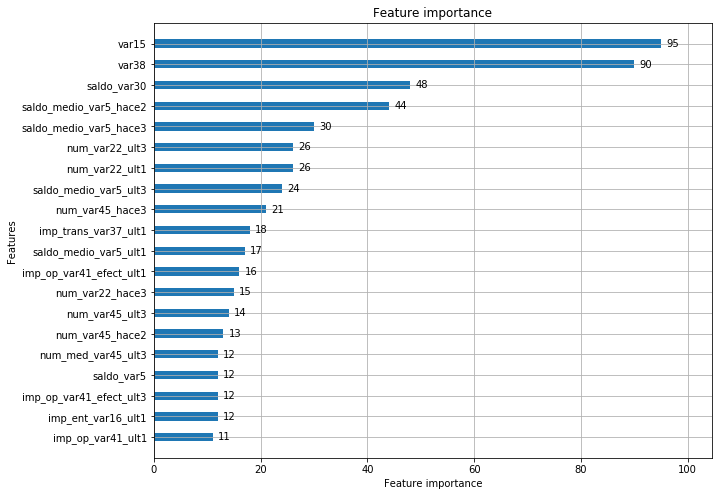

In [20]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax= plt.subplots(1,1, figsize=(10,8))
plot_importance(lgbm_clf,ax=ax,max_num_features=20, height=0.4)